Experiment number one: voting risk depends on the number of voters

In [4]:
import numpy as np
import math
from typing import Callable
from itertools import permutations
from numba import prange
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import timeit
from joblib import Parallel, delayed
import src.optimized_code
from src.utils import read_voting
import os

In [3]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

In [6]:
voting = read_voting(path_voting, table_name="three_candidates")
voting.to_pandas()

,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5,voter_6,voter_7,voter_8,voter_9,...,voter_40,voter_41,voter_42,voter_43,voter_44,voter_45,voter_46,voter_47,voter_48,voter_49
preference_0,1,1,2,1,2,0,2,1,2,1,...,0,1,1,1,0,2,1,2,0,1
preference_1,0,2,1,0,1,2,1,2,1,0,...,1,2,0,0,2,1,2,0,1,2
preference_2,2,0,0,2,0,1,0,0,0,2,...,2,0,2,2,1,0,0,1,2,0


 0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
  0   1   0   0   2   2   0   2   1   1   1   2   1   2   2   1   0   1   0   1   1   1   1   0   1   0   0   2   2   1   1   0   0   1   1   2   2   0   0   1   1   2   0   0   1   1   1   1   2   1   0   2   2   1   2   2   2   2   1   0   1   1   0   0   0   1   1   2   1   0   0   2   1   2   1   0   2   1   1   2   0   0   2   2   0   0   0   1   1   1   2   0   2   1   1   1   0   2   1   0
  2   2   1   1   0   1   1   0   2   2   0   0   2   0   1   0   2   0   2   0   2   0   0   1   2   2   2   0   1   2   0   1   1   2   0   0   1   2   1   2   2   0   1   1   0   0   2   2   0   2 

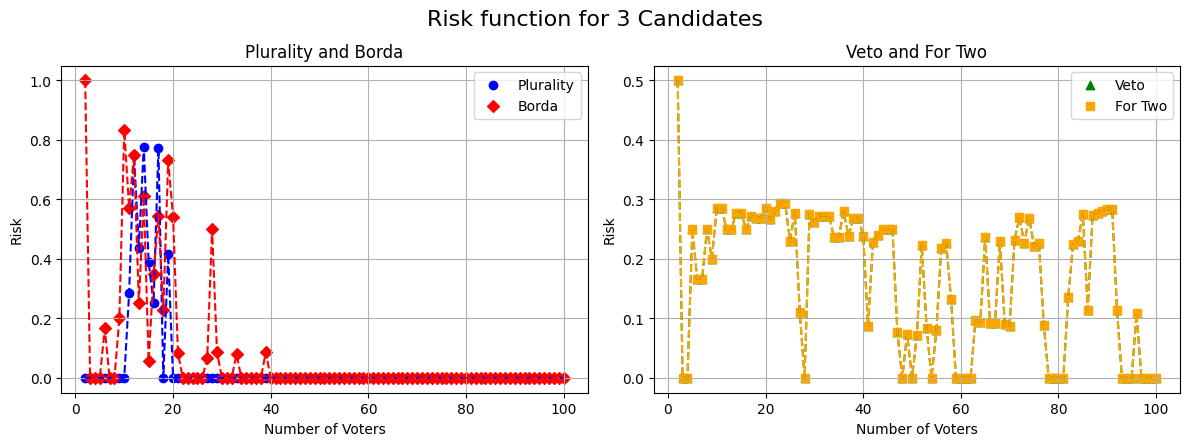

 0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
  2   2   0   0   0   2   2   2   1   3   3   1   1   2   2   0   0   2   3   1   2   2   0   2   3   2   1   1   1   2   3   1   3   2   1   0   1   0   2   0   3   2   0   3   3   1   3   3   0   1   2   2   1   2   0   3   1   0   3   2   2   1   0   2   2   1   3   0   3   2   3   1   2   3   1   0   1   1   1   3   2   3   0   3   1   2   0   0   1   0   0   1   3   0   3   2   2   1   2   2
  1   1   2   2   3   3   0   3   3   1   2   3   2   1   1   1   2   0   2   0   3   0   2   0   1   1   2   3   0   1   1   2   2   0   0   1   3   2   3   3   0   1   1   1   0   3   2   1   2   0 

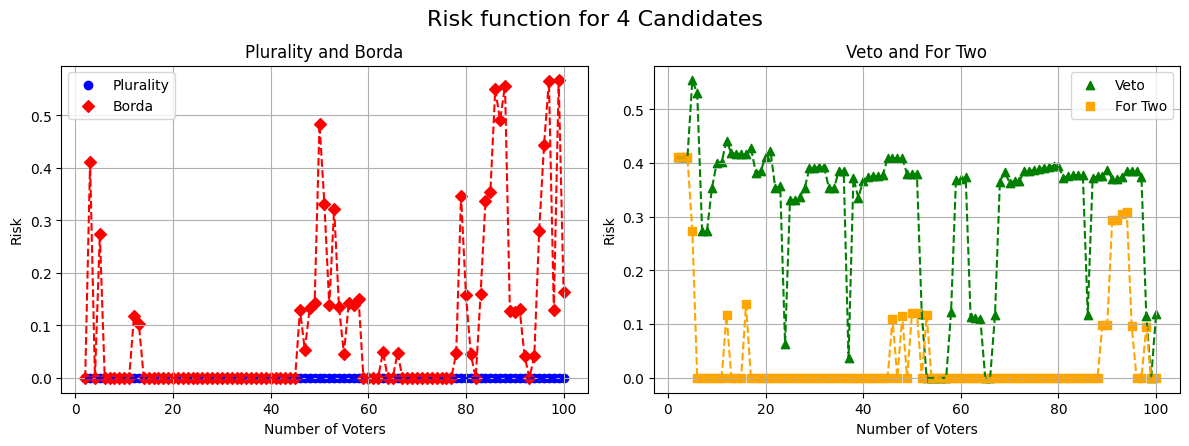

 0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
  4   4   1   1   1   0   4   0   0   0   3   4   0   1   0   4   1   1   0   2   3   0   4   4   4   1   1   0   3   4   1   1   3   0   4   4   2   1   2   2   4   0   3   2   2   1   3   4   4   3   3   3   0   4   1   2   4   4   2   2   1   3   1   1   4   2   2   4   0   3   3   0   3   0   2   1   4   3   0   1   3   2   0   4   3   4   1   3   4   4   0   0   2   3   3   2   2   1   4   1
  2   3   4   0   2   1   0   4   4   4   4   3   1   4   4   1   4   0   4   3   4   3   1   3   0   0   3   3   4   1   2   0   0   2   1   2   3   0   1   3   0   4   2   4   3   3   0   0   2   4 

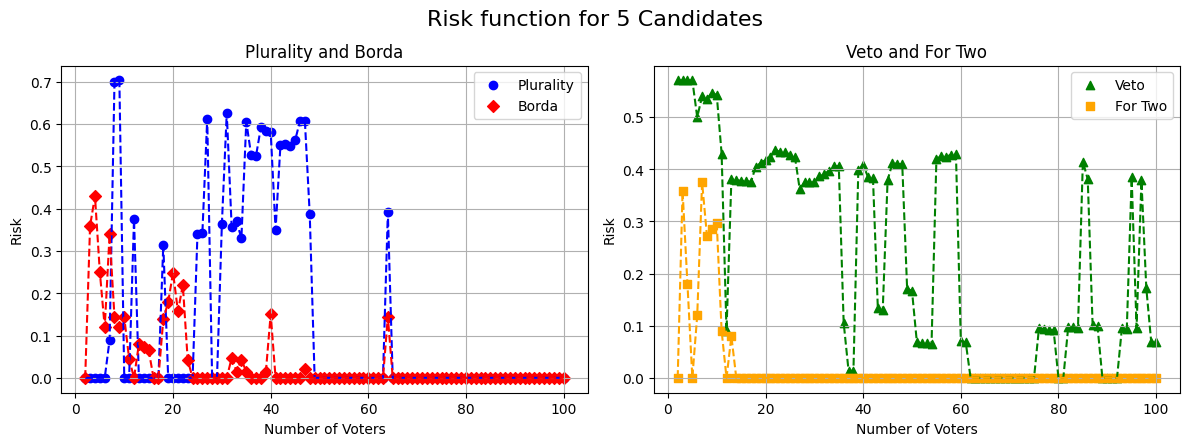

 0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
  2   3   1   4   4   0   2   5   5   3   1   5   1   4   2   0   3   1   4   4   0   3   2   1   3   2   0   0   5   4   5   2   4   2   0   4   5   3   1   5   5   1   2   1   2   4   4   4   0   3   3   0   3   1   4   5   3   1   1   4   3   1   1   4   0   3   4   4   1   2   2   1   0   3   5   5   1   1   1   4   2   1   4   4   3   3   5   0   1   2   2   2   5   5   2   0   4   5   3   3
  1   5   3   5   5   1   0   4   3   4   5   3   2   0   5   4   4   5   1   0   5   1   5   0   4   4   1   1   2   1   2   4   1   5   2   1   2   5   2   2   2   5   1   3   3   5   5   1   5   5 

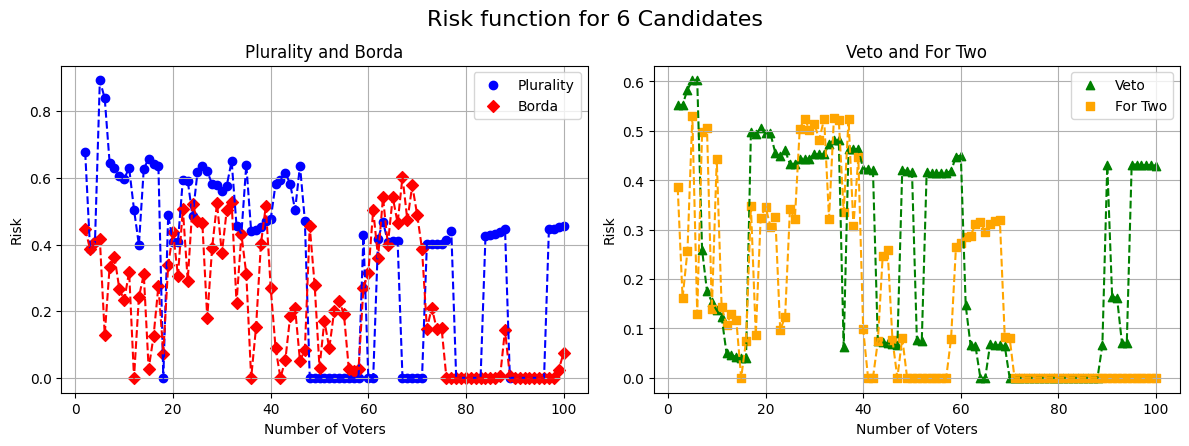

 0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
  3   6   3   0   6   1   1   0   4   0   4   0   4   2   6   5   6   0   4   5   1   2   3   4   4   2   6   1   3   2   6   3   2   0   3   5   3   6   2   1   4   4   6   2   1   6   4   4   1   3   3   5   2   1   0   1   2   3   4   1   6   6   2   4   6   4   6   3   1   5   2   0   4   1   4   6   2   5   4   2   0   2   1   1   5   0   2   5   2   2   3   2   3   4   0   5   1   5   1   1
  2   3   0   2   0   3   3   2   0   2   1   1   0   4   4   2   2   5   0   1   3   0   5   5   6   6   3   6   0   5   2   0   4   3   4   6   0   2   1   0   6   1   1   6   5   2   0   2   6   4 

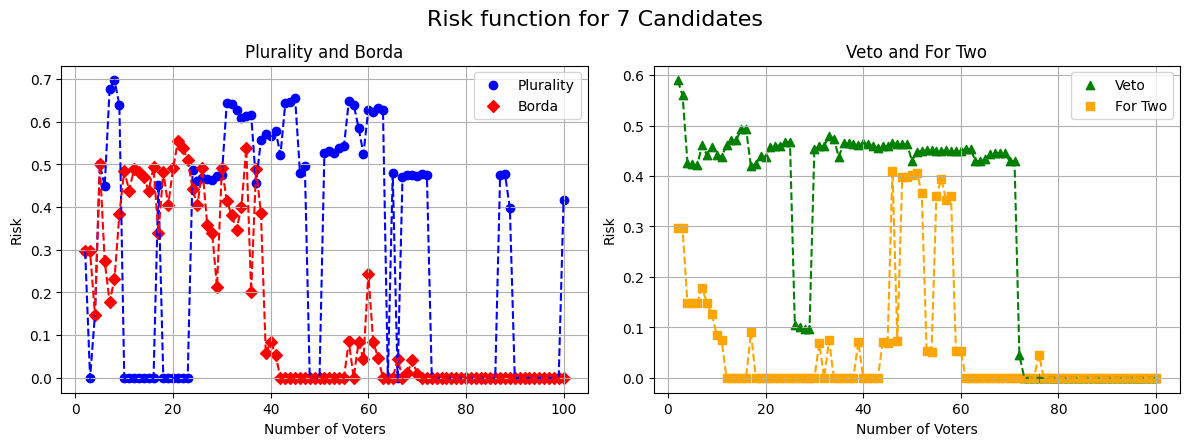

In [25]:
for candidates_current in prange(min_candidates, candidates + 1):
    start_time = timeit.default_timer()

    risk_values_plurality, risk_values_fortwo, risk_values_veto, risk_values_borda = (
        np.zeros(voters - 1) for _ in range(4)
    )
    

    all_random_votes = generate_random_voting_situation_np(voters, candidates_current)
    print(pd.DataFrame(all_random_votes).to_string(index=False))

    for num_voters in range(2, voters + 1):
        voting_situation = all_random_votes[:, :num_voters]

        risk_values_plurality[num_voters - 2] = compute_risk(voting_situation, plurality_outcome)
        risk_values_fortwo[num_voters - 2] = compute_risk(voting_situation, for_two_outcome)
        risk_values_veto[num_voters - 2] = compute_risk(voting_situation, veto_outcome)
        risk_values_borda[num_voters - 2] = compute_risk(voting_situation, borda_outcome)

    end_time = timeit.default_timer()
    iteration_time = end_time - start_time
    print(f"Iteration with {candidates_current} candidates took {iteration_time:.6f} seconds.")

    # Plot the risk function for each voting scheme
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Risk function for {candidates_current} Candidates', fontsize=16)

    plt.subplot(2, 2, 1)
    plt.title('Plurality and Borda')
    plt.xlabel('Number of Voters')
    plt.ylabel('Risk')
    plt.scatter(range(2, voters + 1), risk_values_plurality, label='Plurality', marker='o', color='blue')
    plt.plot(range(2, voters + 1), risk_values_plurality, linestyle='--', color='blue')
    plt.scatter(range(2, voters + 1), risk_values_borda, label='Borda', marker='D', color='red')
    plt.plot(range(2, voters + 1), risk_values_borda, linestyle='--', color='red')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.title('Veto and For Two')
    plt.xlabel('Number of Voters')
    plt.ylabel('Risk')
    plt.scatter(range(2, voters + 1), risk_values_veto, label='Veto', marker='^', color='green')
    plt.plot(range(2, voters + 1), risk_values_veto, linestyle='--', color='green')
    plt.scatter(range(2, voters + 1), risk_values_fortwo, label='For Two', marker='s', color='orange')
    plt.plot(range(2, voters + 1), risk_values_fortwo, linestyle='--', color='orange')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
